## Import required  packages

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import pickle
import warnings
from IPython.display import display

## Import dataset

This section includes:
+ Downloading data from kaggle
+ Data cleaning
    + Conversion of Variable Data Types
    + Removal of Irrelevant Variables
    + Handling of Missing Variables
    + Undersampling of Imbalanced Dataset

In [2]:
sys.path.append('../scripts')
import data_preprocessing

data_preprocessing.data_preprocessing()

Base.csv found. Skipping the download and extraction process...
Data Preprocessing...
Data Preprocessing completed successfully. Data saved to 'data/processed/undersampled_data.csv'.
Splitting the dataset into train-test subset...
Train-test split completed successfully. Data saved to 'data/processed/X_train.csv', 'data/processed/X_test.csv', 'data/processed/y_train.csv', and 'data/processed/y_test.csv'.


### Read in processed dataset

In [3]:
# Read the CSV file into a DataFrame
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52776 entries, 0 to 52775
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            52776 non-null  float64
 1   name_email_similarity             52776 non-null  float64
 2   prev_address_months_count         52776 non-null  int64  
 3   current_address_months_count      52776 non-null  int64  
 4   customer_age                      52776 non-null  int64  
 5   days_since_request                52776 non-null  float64
 6   intended_balcon_amount            52776 non-null  float64
 7   payment_type                      52776 non-null  object 
 8   zip_count_4w                      52776 non-null  int64  
 9   velocity_6h                       52776 non-null  float64
 10  velocity_24h                      52776 non-null  float64
 11  velocity_4w                       52776 non-null  float64
 12  bank

## Baseline Model

### One-hot encoding for categorical variables

**X_train Dataset**

In [5]:
# Split categorical and non-categorical variables
train_cat = X_train.select_dtypes(include='object')
train_non_cat = X_train.select_dtypes(exclude='object')

# Perform one-hot encoding on categorical variables
train_one_hot_encoded = pd.get_dummies(train_cat)

# Combine the non-categorical and one-hot encoded categorical variables
X_train = pd.concat([train_non_cat, train_one_hot_encoded], axis=1)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52776 entries, 0 to 52775
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            52776 non-null  float64
 1   name_email_similarity             52776 non-null  float64
 2   prev_address_months_count         52776 non-null  int64  
 3   current_address_months_count      52776 non-null  int64  
 4   customer_age                      52776 non-null  int64  
 5   days_since_request                52776 non-null  float64
 6   intended_balcon_amount            52776 non-null  float64
 7   zip_count_4w                      52776 non-null  int64  
 8   velocity_6h                       52776 non-null  float64
 9   velocity_24h                      52776 non-null  float64
 10  velocity_4w                       52776 non-null  float64
 11  bank_branch_count_8w              52776 non-null  int64  
 12  date

**X_test Dataset**

In [7]:
# Split categorical and non-categorical variables
test_cat = X_test.select_dtypes(include='object')
test_non_cat = X_test.select_dtypes(exclude='object')

# Perform one-hot encoding on categorical variables
test_one_hot_encoded = pd.get_dummies(test_cat)

# Combine the non-categorical and one-hot encoded categorical variables
X_test = pd.concat([test_non_cat, test_one_hot_encoded], axis=1)

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            13194 non-null  float64
 1   name_email_similarity             13194 non-null  float64
 2   prev_address_months_count         13194 non-null  int64  
 3   current_address_months_count      13194 non-null  int64  
 4   customer_age                      13194 non-null  int64  
 5   days_since_request                13194 non-null  float64
 6   intended_balcon_amount            13194 non-null  float64
 7   zip_count_4w                      13194 non-null  int64  
 8   velocity_6h                       13194 non-null  float64
 9   velocity_24h                      13194 non-null  float64
 10  velocity_4w                       13194 non-null  float64
 11  bank_branch_count_8w              13194 non-null  int64  
 12  date

### Model Training

For our baseline model, we employed a logistic regression approach to train on the entire dataset, with categorical variables one-hot encoded. Additionally, we implemented K-fold cross-validation during both model training and evaluation stages.

In [9]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Define the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)

# Initialize the KFold cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=kf, scoring='f1')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Compute the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)

# Fit the model to the entire training dataset
baseline_model.fit(X_train, y_train)

## Test Logistic Regression model
bm_pred = baseline_model.predict(X_test)

## Evaluate the performance of the baseline_model
# Compute accuracy
accuracy = accuracy_score(y_test, bm_pred)
# Compute precision
precision = precision_score(y_test, bm_pred)
# Compute recall
recall = recall_score(y_test, bm_pred)
# Compute F1 score
f1 = f1_score(y_test, bm_pred)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, bm_pred)
roc_auc = auc(fpr, tpr)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, bm_pred)

# Reset warnings settings
warnings.resetwarnings()

Cross-validation scores: [0.23416856 0.28509532 0.28086278 0.24526601 0.30928726]
Mean cross-validation score: 0.2709359858132305


### Save trained model

In [ ]:
### Save the trained model to a file
# Open a file in binary write mode
with open('../models/baseline_model.pkl', 'wb') as file:
    # Use pickle.dump() to save the model to the file
    pickle.dump(baseline_model, file)

### Results

**Classification Report**

In [10]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8443989692284372
Precision: 0.5862552594670407
Recall: 0.19209558823529413
F1 Score: 0.28937348563516785


**AUC**

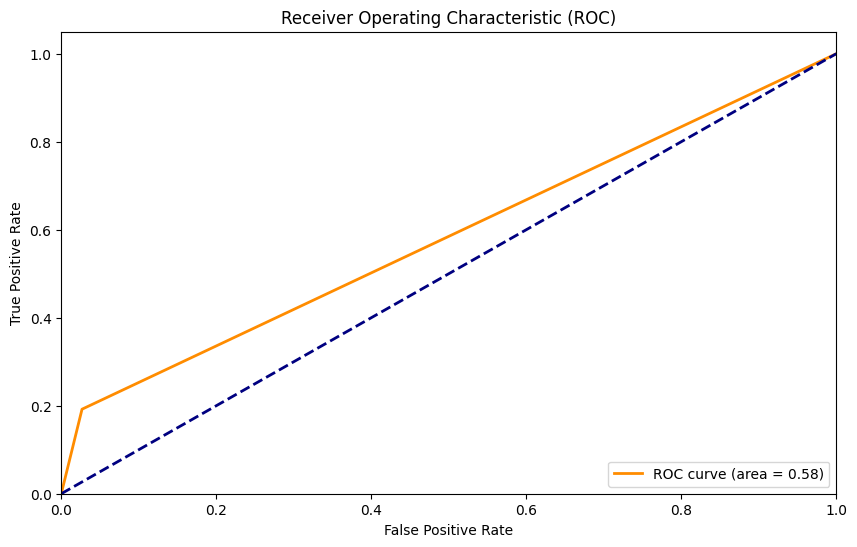

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Confusion Matrix**

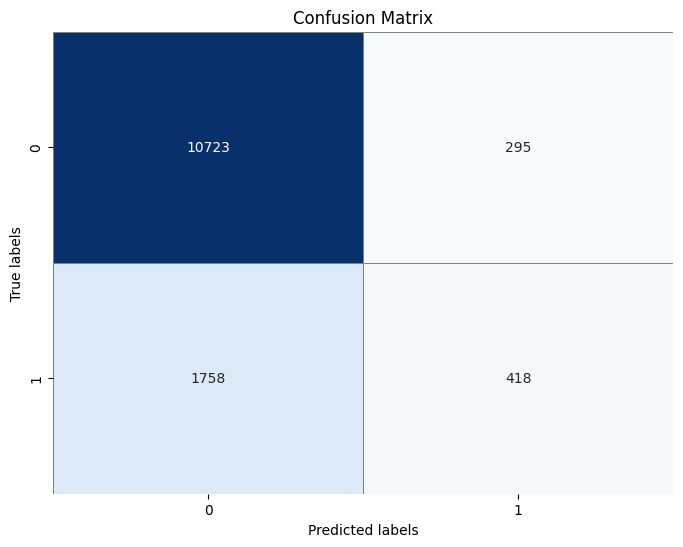

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()